In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets
import sys

def initialize(data, k):
    centroids = []
    centroids.append(data[np.random.randint(
            data.shape[0]), :])
  
   
    for c_id in range(k - 1):
          
        dist = []
        for i in range(data.shape[0]):
            point = data[i, :]
            d = sys.maxsize
              
            for j in range(len(centroids)):
                temp_dist = (((point-centroids[j])**2).sum())**0.5
                d = min(d, temp_dist)
            dist.append(d)
              
        dist = np.array(dist)
        next_centroid = data[np.argmax(dist), :]
        centroids.append(next_centroid)
        dist = []
       
    return centroids
def kmeans(dataset, k):
    
    centroids =initialize(dataset, k)
    dic_centroids={}
    dic_centroids_old={}
    for i in range(0,k):
        dic_centroids[i]=[]
        dic_centroids_old[i]=[]
    convergio=False
    iteracion = 1
    while not convergio:
        #print("Iteracion:",iteracion)
        iteracion+=1
        classes=[]
        for i in range(0,len(dataset)):
            min_dist = np.inf
            c = -1
            for j in range(0,k):
                
                temp_dist=(((np.array(dataset[i])-np.array(centroids[j]))**2).sum())**0.5
                
                if temp_dist < min_dist:
                    c=j
                    min_dist=temp_dist
            classes.append(c)
            dic_centroids[c].append(dataset[i])
        
        iguales = True
        for i in range(0,k):
            temp = [sum(x)/len(x) for x in zip(*dic_centroids[i])]
            fin = True
            for j in range(0,len(temp)):
                if(temp[j]!=centroids[i][j]):
                    fin=False
            if not fin: 
                centroids[i]=temp
                iguales=False
            
            dic_centroids[i]=[]
        convergio=iguales   
       
       
    return centroids,classes


def elbow_method(dataset,k_inicial,k_final):
    res=[]
    dic={}
    for k in range(k_inicial,k_final+1):
        centroids,classes=kmeans(dataset,k)
        sse=0
        for i in range(0,len(dataset)):
            sse+=(np.linalg.norm(np.array(dataset[i])-np.array(centroids[classes[i]])))
        res.append(sse)
        dic[k]=[centroids,classes]
    return dic,res


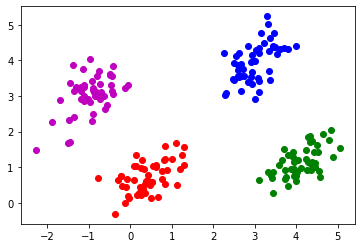

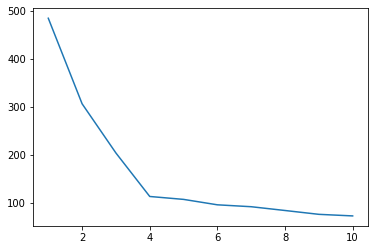

In [3]:
mean_1 = [0.5, 0.8]
cov_1 = [[0.2, 0.1], [0.1, 0.2]]
train_1 = np.random.multivariate_normal(mean_1, cov_1, 50)

x_1 = train_1[:,0]
y_1 = train_1[:,1]


mean_2 = [3, 4]
cov_2 = [[0.2, 0.1], [0.1, 0.2]]
train_2 = np.random.multivariate_normal(mean_2, cov_2, 50)

x_2 = train_2[:,0]
y_2 = train_2[:,1]
    
mean_3 = [-1, 3]
cov_3 = [[0.2, 0.1], [0.1, 0.2]]
train_3 = np.random.multivariate_normal(mean_3, cov_3, 50)

x_3 =train_3[:,0]
y_3= train_3[:,1]

mean_4 = [4, 1]
cov_4 = [[0.2, 0.1], [0.1, 0.2]]
train_4 = np.random.multivariate_normal(mean_4, cov_4, 50)

x_4 =train_4[:,0]
y_4= train_4[:,1]

plt.plot(x_1,y_1,'ro')
plt.plot(x_2,y_2,'bo')
plt.plot(x_3,y_3,'mo')
plt.plot(x_4,y_4,'go')

plt.show()
dataset=[]

for i in range(0,len(x_1)):

    dataset.append([x_1[i],y_1[i]])
    dataset.append([x_2[i],y_2[i]])
    dataset.append([x_3[i],y_3[i]])
    dataset.append([x_4[i],y_4[i]])

dic,res=elbow_method(np.array(dataset),1,10)


plt.plot(list(range(1,10+1)),res)
plt.show()

